In [24]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

In [25]:
# The tech stocks we'll use for this analysis
ticker = 'MSFT'

# To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 2,end.month,end.day)


# Creating loop for grabing yahoo finance data and setting as a dataframe

  
    #To set DataFrame as the Stock Ticker
    
df = web.DataReader(ticker,'yahoo',start,end)['Adj Close']

In [26]:
df.head()

Date
2018-03-13    91.630577
2018-03-14    91.087044
2018-03-15    91.407333
2018-03-16    91.814964
2018-03-19    90.155304
Name: Adj Close, dtype: float64

In [27]:
df.tail()

Date
2020-03-09    150.619995
2020-03-10    160.919998
2020-03-11    153.630005
2020-03-12    139.059998
2020-03-13    144.832794
Name: Adj Close, dtype: float64

In [28]:
df.shape

(505,)

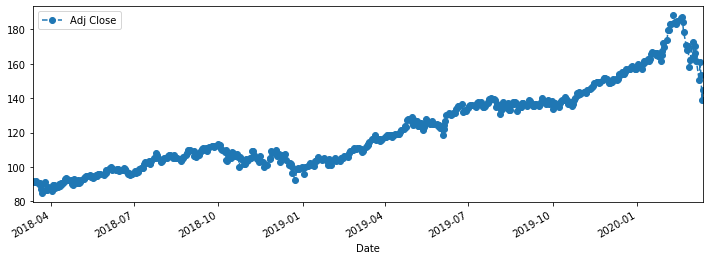

In [29]:
df.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')



In [30]:
df.describe()

count    505.000000
mean     121.677781
std       23.770736
min       84.613426
25%      103.453575
50%      113.126457
75%      137.276642
max      188.185989
Name: Adj Close, dtype: float64

In [31]:
df
df.head()

Date
2018-03-13    91.630577
2018-03-14    91.087044
2018-03-15    91.407333
2018-03-16    91.814964
2018-03-19    90.155304
Name: Adj Close, dtype: float64

In [32]:
df.describe()

count    505.000000
mean     121.677781
std       23.770736
min       84.613426
25%      103.453575
50%      113.126457
75%      137.276642
max      188.185989
Name: Adj Close, dtype: float64

In [33]:
df = df.reset_index()

In [34]:
df.head()

,Date,Adj Close
0,2018-03-13,91.630577
1,2018-03-14,91.087044
2,2018-03-15,91.407333
3,2018-03-16,91.814964
4,2018-03-19,90.155304


In [35]:
df[['ds','y']] = df[['Date' ,'Adj Close']]

In [36]:
df = df[['ds','y']]
df.head(20)

mon2 = df

mon2['Weekday'] = mon2['ds'].dt.day_name()


mon2 =  mon2[(mon2['Weekday'] == 'Monday')]

mon2.head()


,ds,y,Weekday
4,2018-03-19,90.155304,Monday
9,2018-03-26,91.019112,Monday
13,2018-04-02,85.913963,Monday
18,2018-04-09,88.097717,Monday
23,2018-04-16,91.397629,Monday


In [37]:
# Importing the prophet library:

import fbprophet

In [38]:
# After importing the prophet library we need to create an instance of a Prophet object
#Instantiating: Instantiation − The creation of an instance of a class. Method − A special kind of function that is defined in a class definition. Object − A unique instance of a data structure that's defined by its class. An object comprises both data members (class variables and instance variables) and methods.
#https://www.tutorialspoint.com/python/python_classes_objects.htm

m = fbprophet.Prophet()

In [39]:
# Now we have to use the fit method on the prophet object and pass in our dataframe because we need to fit our model to our historical data.

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
# Now it is time to create future dates, using Prophet and its builtin helper function "make_future_dataframe"

future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2018-03-13
1,2018-03-14
2,2018-03-15
3,2018-03-16
4,2018-03-19


In [41]:
# Now it is time to predict future stock prices using the predict method

forecast = m.predict(future)

forecast.tail(10)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
860,2021-03-04,194.168880,130.518365,271.851807,125.464345,266.389855,4.902763,4.902763,4.902763,-0.879032,-0.879032,-0.879032,5.781795,5.781795,5.781795,0.0,0.0,0.0,199.071644
861,2021-03-05,194.260537,130.527707,272.231399,125.259828,266.887680,4.146330,4.146330,4.146330,-0.958541,-0.958541,-0.958541,5.104871,5.104871,5.104871,0.0,0.0,0.0,198.406867
862,2021-03-06,194.352193,131.818801,274.069340,125.057011,267.385506,7.043396,7.043396,7.043396,2.546880,2.546880,2.546880,4.496515,4.496515,4.496515,0.0,0.0,0.0,201.395589
863,2021-03-07,194.443849,132.246797,274.114389,124.854194,267.883332,6.507823,6.507823,6.507823,2.546880,2.546880,2.546880,3.960942,3.960942,3.960942,0.0,0.0,0.0,200.951672
864,2021-03-08,194.535506,125.628990,270.394917,124.651378,268.373478,2.248810,2.248810,2.248810,-1.251975,-1.251975,-1.251975,3.500785,3.500785,3.500785,0.0,0.0,0.0,196.784316
865,2021-03-09,194.627162,127.052328,272.119751,124.448561,268.862644,2.098321,2.098321,2.098321,-1.018746,-1.018746,-1.018746,3.117067,3.117067,3.117067,0.0,0.0,0.0,196.725483
866,2021-03-10,194.718818,125.540262,270.693181,124.245745,269.310913,1.823745,1.823745,1.823745,-0.985468,-0.985468,-0.985468,2.809213,2.809213,2.809213,0.0,0.0,0.0,196.542563
867,2021-03-11,194.810474,127.355391,270.187282,124.042928,269.676000,1.696066,1.696066,1.696066,-0.879032,-0.879032,-0.879032,2.575098,2.575098,2.575098,0.0,0.0,0.0,196.506540
868,2021-03-12,194.902131,125.730397,271.335188,123.840112,269.988576,1.452586,1.452586,1.452586,-0.958541,-0.958541,-0.958541,2.411126,2.411126,2.411126,0.0,0.0,0.0,196.354716
869,2021-03-13,194.993787,129.593521,274.860729,123.648973,269.942101,4.859236,4.859236,4.859236,2.546880,2.546880,2.546880,2.312356,2.312356,2.312356,0.0,0.0,0.0,199.853023


In [42]:
forecast['Weekday'] = forecast['ds'].dt.day_name()

forecast

mon =  forecast[(forecast['Weekday'] == 'Monday')]

mon = mon[['ds','yhat']]

Stockpre = pd.merge(mon, mon2, on ='ds')

Stockpre["tom"] = Stockpre["yhat"].shift(-1)

Stockpre.head(50)

,ds,yhat,y,Weekday,tom
0,2018-03-19,88.134045,90.155304,Monday,90.069725
1,2018-03-26,90.069725,91.019112,Monday,90.514132
2,2018-04-02,90.514132,85.913963,Monday,89.890821
3,2018-04-09,89.890821,88.097717,Monday,90.103387
4,2018-04-16,90.103387,91.397629,Monday,91.930993
5,2018-04-23,91.930993,92.542877,Monday,94.002077
6,2018-04-30,94.002077,90.766754,Monday,94.491949
7,2018-05-07,94.491949,93.387268,Monday,93.380714
8,2018-05-14,93.380714,95.143990,Monday,92.519605
9,2018-05-21,92.519605,95.137230,Monday,95.796645


In [43]:
yhat = delta = total = cost = 0.0
status = "cash"
first = Stockpre['y'][0]
final = Stockpre['y'].iloc[-1]
boring = final - first
tradecount = 0


for index, row in Stockpre.iterrows():
    print(f" On {row['ds']}")
    #check predicition value for next week "yhat" vs the current ticker value "current"
    if row['tom'] >= row['y']:
        #If holding cash, initiate buy, set cost to current stock price 'y' 
        #reset "current" for comparison, change status to holding stock 
        if status == "cash":
            cost = row['y']
            print(f" bought stock @ {cost}: price {row['y']} vs {row['tom']} ")
            status = "hold"
        
        elif status == "hold":
            print(f" held stock @ cost {cost} : price {row['y']} vs {row['tom']}")

    elif row['tom'] < row['y']:
        if status == "hold":
            print(f" sold @ cost {cost} : price {row['y']} vs {row['tom']}")
            delta = row['y'] - cost
            total = total + delta
            status = "cash"
            cost = 0.0
            print(f" profit {delta}")
        elif status == "cash" :
            print(f" held cash : price {row['y']} vs {row['tom']}")

if status == "hold":
    delta = final - cost
    total = total + delta 
    print(f"Final Networth :  cash {total}") 
                  
if status == "cash":
    print(f"Final Networth :  cash {total}")

print(f"If you had bought and held from day 1, {first} to {final}, you'd have made {boring} ")


On 2018-03-19 00:00:00
 held cash : price 90.15530395507812 vs 90.06972467086452
 On 2018-03-26 00:00:00
 held cash : price 91.01911163330078 vs 90.51413218833405
 On 2018-04-02 00:00:00
 bought stock @ 85.9139633178711: price 85.9139633178711 vs 89.89082146915361 
 On 2018-04-09 00:00:00
 held stock @ cost 85.9139633178711 : price 88.09771728515625 vs 90.10338687990969
 On 2018-04-16 00:00:00
 held stock @ cost 85.9139633178711 : price 91.39762878417969 vs 91.93099289004674
 On 2018-04-23 00:00:00
 held stock @ cost 85.9139633178711 : price 92.54287719726562 vs 94.0020769129715
 On 2018-04-30 00:00:00
 held stock @ cost 85.9139633178711 : price 90.76675415039062 vs 94.49194864885135
 On 2018-05-07 00:00:00
 sold @ cost 85.9139633178711 : price 93.38726806640625 vs 93.38071409206871
 profit 7.473304748535156
 On 2018-05-14 00:00:00
 held cash : price 95.14398956298828 vs 92.51960469289153
 On 2018-05-21 00:00:00
 bought stock @ 95.1372299194336: price 95.1372299194336 vs 95.79664498396

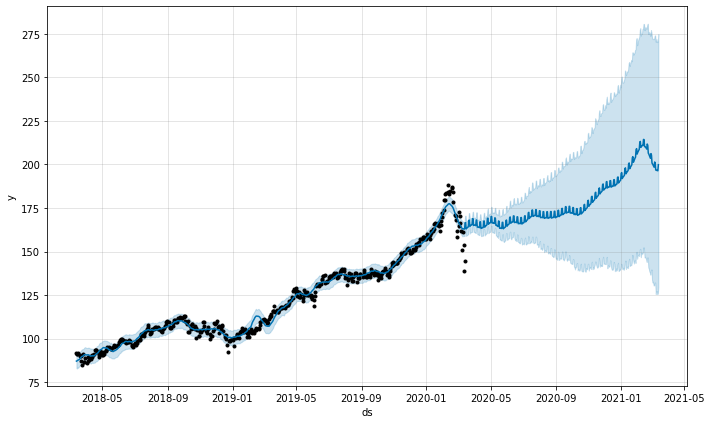

In [44]:
# Visualisation:

m.plot(forecast);

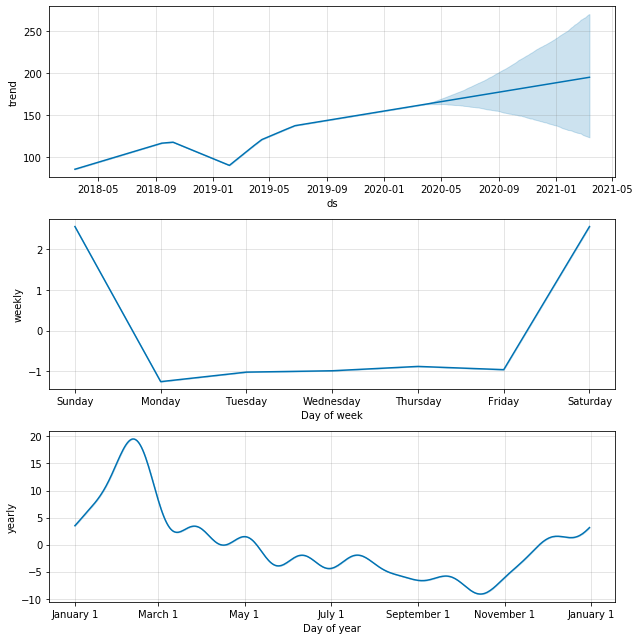

In [45]:
# If you want to visualize the individual forecast components, you can use Prophet’s built-in plot_components method:

m.plot_components(forecast);

In [46]:
df.describe()

,y
count,505.000000
mean,121.677781
std,23.770736
min,84.613426
25%,103.453575
50%,113.126457
75%,137.276642
max,188.185989


In [47]:
df.shape

(505, 3)

In [48]:
forecast.shape

(870, 20)

In [49]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.0,870.0,870.0,870.000000
mean,146.068135,130.900532,160.682861,134.239425,158.553991,-0.627517,-0.627517,-0.627517,-0.586778,-0.586778,-0.586778,-0.040739,-0.040739,-0.040739,0.0,0.0,0.0,145.440618
std,33.080826,24.421361,50.398221,23.359095,50.113250,6.781589,6.781589,6.781589,1.167446,1.167446,1.167446,6.675313,6.675313,6.675313,0.0,0.0,0.0,34.421971
min,85.726842,82.788858,91.461525,85.726842,85.726842,-10.383871,-10.383871,-10.383871,-1.251975,-1.251975,-1.251975,-9.131896,-9.131896,-9.131896,0.0,0.0,0.0,87.039349
25%,113.244743,104.464337,112.571541,113.244743,113.244743,-5.300250,-5.300250,-5.300250,-1.018746,-1.018746,-1.018746,-4.748694,-4.748694,-4.748694,0.0,0.0,0.0,108.539178
50%,152.236134,138.622691,156.330318,140.444453,152.236134,-2.133230,-2.133230,-2.133230,-0.985468,-0.985468,-0.985468,-1.972454,-1.972454,-1.972454,0.0,0.0,0.0,152.287743
75%,175.081461,150.282851,190.011072,155.100392,193.571434,1.779034,1.779034,1.779034,-0.879032,-0.879032,-0.879032,2.353324,2.353324,2.353324,0.0,0.0,0.0,170.962935
max,194.993787,173.617256,280.842355,163.170136,269.988576,21.937551,21.937551,21.937551,2.546880,2.546880,2.546880,19.528702,19.528702,19.528702,0.0,0.0,0.0,214.364962
